### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\begin{align}
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) &= 0\\ 
\frac{d^2 T}{d x^2} &= - \alpha (T_0 - T)\\ 
\end{align}
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [2]:
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import numpy as np

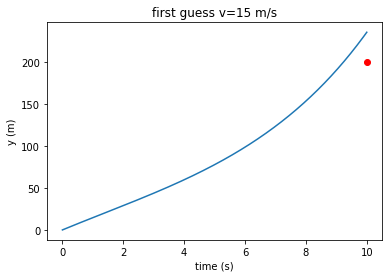

In [18]:
# constants
alp = 5e-2
t0 = 20

# initial conditions
y0 = 0
v0 = 15 # our 1st guess for v0

# boundary conditions
tf = 10
yf = 200  # y at t=10s

# [y, y']
y_init = [y0, v0]


def rhs(y, t):
    return [y[1], -alp*(t0 - y[0])]


t = np.linspace(0, 10, 1000)
# y = odeint(rhs, y_init, t)


def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.plot(t, y[:, 0])
    # plot the boundary at t_final
    plt.plot(tf, yf, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('y (m)')
    plt.title(title)
    plt.show()


plot_graph(f'first guess v={v0} m/s', odeint(rhs, y_init, t), t, yf, tf)

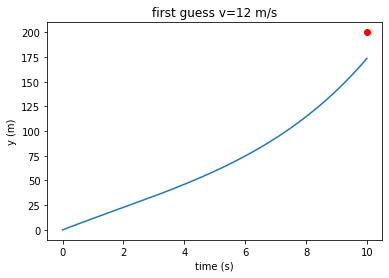

In [19]:
v0 = 12
plot_graph(f'first guess v={v0} m/s', odeint(rhs, [y0, v0], t), t, yf, tf)

Optimized speed using shooting method is v=13.278405108171421 m/s


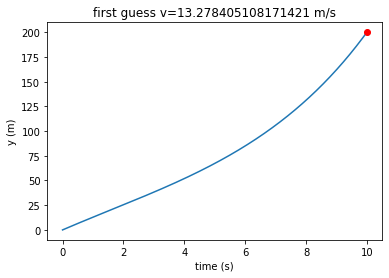

In [20]:
def objective_func(v0):
    sol = odeint(rhs, [y0, v0], t)
    y_final = sol[-1, 0]
    return y_final - yf


v0 = brentq(objective_func, 10, 50)
print(f'Optimized speed using shooting method is v={v0} m/s')
plot_graph(f'first guess v={v0} m/s', odeint(rhs, [y0, v0], t), t, yf, tf)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

$$
\begin{align}
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) &= 0\\ 
\frac{d^2 T}{d x^2} &= - \alpha (T_0 - T)\\ 
\frac{y_{i-1}- 2 y_i +y_{i+1}}{h^2} &= - \alpha (T_0 - T)\\ 
\frac{y_{i-1}- 2 y_i +y_{i+1}}{h^2} &= - \alpha (y_0 - y_i)\\
\frac{y_{i-1}- 2 y_i +y_{i+1}}{h^2} &= - \alpha y_0 + \alpha y_i\\
y_{i-1}- 2 y_i + y_{i+1} &= (-\alpha y_0 + \alpha y_i) \cdot h^2\\
y_{i-1}- 2 y_i + y_{i+1} &= -\alpha y_0 h^2 + \alpha y_i h^2\\
y_{i-1}- 2 y_i - \alpha y_i h^2 +y_{i+1} &= -\alpha y_0 h^2
\end{align}
$$
Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

A:  [[ 1.      0.      0.     ...  0.      0.      0.    ]
 [ 1.     -2.0005  1.     ...  0.      0.      0.    ]
 [ 0.      1.     -2.0005 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ... -2.0005  1.      0.    ]
 [ 0.      0.      0.     ...  1.     -2.0005  1.    ]
 [ 0.      0.      0.     ...  0.      0.      1.    ]]
b:  [ 5.e+01 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02

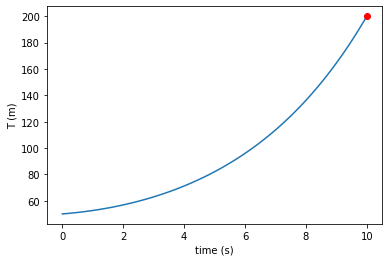

In [6]:
n = 100
h = (10-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2 - alp * h**2
    A[i, i+1] = 1

print("A: ", A)

# Get b
b = np.zeros(n+1)
b[0] = 50 # T(0) = 50
b[1:-1] = -alp * t0 * h**2
b[-1] = 200 # T(10) = 200
print("b: ", b)

# solve the linear equations A x = b
y = np.linalg.solve(A, b)

t = np.linspace(0, 10, n + 1)

plt.plot(t, y)
plt.plot(tf, yf, 'ro')
plt.xlabel('time (s)')
plt.ylabel('T (m)')
plt.show()